In [50]:
import numpy as np
import pandas as pd

In [52]:
df=pd.read_csv("players_22.csv")

C:\Users\jaanh\AppData\Local\Temp\ipykernel_14732\54485665.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("players_22.csv")


In [54]:
df.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [56]:
features=["overall","potential","wage_eur","age"]

In [58]:
df=df.dropna(subset=features)

In [60]:
data=df[features].copy()

In [62]:
data.head(2)

,overall,potential,wage_eur,age
0,93,93,320000.0,34
1,92,92,270000.0,32


In [64]:
#scale the data-- normalize the data
#initialize random centroids
#label each data point 
#update centroids
#repeat steps 3 and 4 until centroids stop chaning a lot


In [66]:
data=((data- data.min())/(data.max()-data.min()))*9 +1  #min needs to be greater than zero(0 to 1 scale)

In [68]:
data.head()

,overall,potential,wage_eur,age
0,10.000000,9.608696,9.227468,5.263158
1,9.804348,9.413043,7.939914,4.789474
2,9.608696,9.217391,7.939914,5.736842
3,9.608696,9.217391,7.939914,4.078947
4,9.608696,9.217391,10.000000,4.315789


In [70]:
data.describe()

,overall,potential,wage_eur,age
count,19178.000000,19178.000000,19178.000000,19178.000000
mean,4.670483,5.319304,1.219347,3.179224
std,1.346563,1.191404,0.501378,1.124096
min,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,2.184211
50%,4.717391,5.304348,1.064378,3.131579
75%,5.500000,6.086957,1.193133,4.078947
max,10.000000,10.000000,10.000000,10.000000


In [72]:
def random_centroids(data,k):
        
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x: float(x.sample()))#random centroids
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [74]:
centroids = random_centroids(data,4)
centroids

C:\Users\jaanh\AppData\Local\Temp\ipykernel_14732\986573963.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=data.apply(lambda x: float(x.sample()))#random centroids


,0,1,2,3
overall,5.304348,4.130435,3.934783,4.326087
potential,7.456522,3.934783,4.913043,6.673913
wage_eur,1.038627,1.115880,1.682403,1.270386
age,6.210526,5.026316,1.236842,2.657895


In [76]:
centroids.T

,overall,potential,wage_eur,age
0,5.304348,7.456522,1.038627,6.210526
1,4.130435,3.934783,1.115880,5.026316
2,3.934783,4.913043,1.682403,1.236842
3,4.326087,6.673913,1.270386,2.657895


In [78]:
def get_labels(data,centroids):
    distances=centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
    least_dist=[]
    for idx,row in distances.iterrows():
        least_dist.append(row.idxmin())
    least_dist_df = pd.DataFrame(least_dist, columns=['Min_Column'])
    return least_dist_df

In [80]:
labels=get_labels(data,centroids)
labels

,Min_Column
0,0
1,0
2,0
3,0
4,0
...,...
19173,2
19174,2
19175,2
19176,2


In [81]:
labels.value_counts()

Min_Column
3             7846
1             5845
2             4290
0             1197
Name: count, dtype: int64

In [84]:
def new_centroids(data,labels,k):
    return data.groupby(labels['Min_Column']).apply(lambda x:np.exp(np.log(x).mean())).T

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [121]:
%pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [122]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [130]:
def plot_clusters(data,labels,centroids,iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroids_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels['Min_Column'])
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

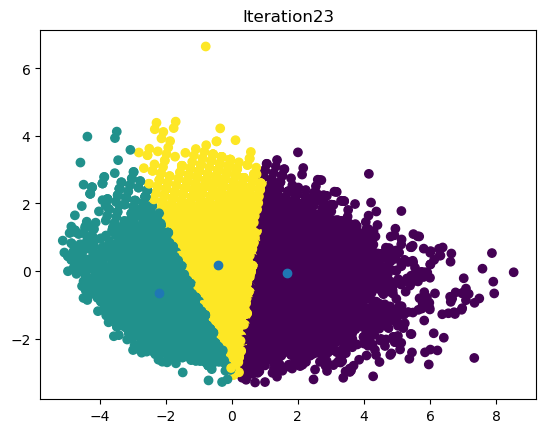

In [132]:
max_iterations=56
centroid_count=3
centroids=random_centroids(data,centroid_count)
old_centroids=pd.DataFrame()
iteration =1
while iteration<max_iterations and not centroids.equals(old_centroids):
    old_centroids=centroids
    labels=get_labels(data,centroids)
    centroids=new_centroids(data,labels,centroid_count)
    plot_clusters(data,labels,centroids,iteration)
    iteration+=1
    